## 데이터 불러오기
- Google Drive에서 데이터를 불러오는 코드

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## 기술통계량

In [ ]:
import pandas as pd # 데이터 가공 및 데이터 불러오기
import seaborn as sns # 시각화, 통계 시각화를 구현할 수 있는 라이브러리

tips = sns.load_dataset("tips") # 데이터 불러오기
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


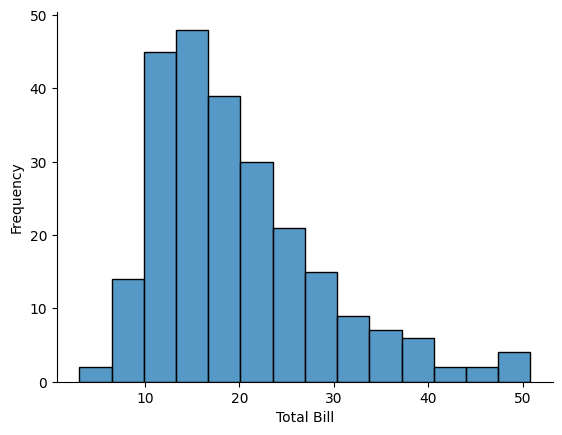

In [ ]:
import seaborn as sns

ax = sns.histplot(tips["total_bill"])
ax.set(xlabel ="Total Bill", ylabel = "Frequency")

sns.despine()

### The mean, median, trimmed mean

In [49]:
import numpy as np
np.mean(tips["total_bill"])
tips["total_bill"].mean()

19.78594262295082

In [ ]:
np.median(tips["total_bill"])

17.795

- Trimmed Mean : 이상값이 존재하는 경우 일부 비율 제거 후 평균

In [ ]:
from scipy import stats
stats.trim_mean(tips["total_bill"], 0.2)

18.23216216216216

### Mode
- 명목척도 데이터셋에는 value_counts() 사용

In [50]:
import seaborn as sns
tips = sns.load_dataset("tips")
tips['day'].value_counts()

,count
day,
Sat,87
Sun,76
Thur,62
Fri,19


In [ ]:
tips['day'].value_counts().max()

87

In [ ]:
tips['day'].value_counts().min()

19

In [ ]:
tips['day'].mode() # 최빈값의 값을 표시 할 때,

0    Sat
Name: day, dtype: category
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

### IQR
- 50% 범위

In [ ]:
import numpy as np
np.quantile(tips["total_bill"], 0.5)

17.795

In [ ]:
tips["total_bill"].median()

17.795

In [ ]:
np.quantile(tips["total_bill"], [0.25, .75])

array([13.3475, 24.1275])

In [ ]:
from scipy import stats
stats.iqr(tips["total_bill"])

10.779999999999998

### 첨도와 왜도

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
url = "/content/drive/MyDrive/Colab Notebooks/2024/한국SW기술진흥협회/Python기초통계/data/skewdata.csv"
df_skew = pd.read_csv(url)
df_skew

,Unnamed: 0,Skew,Values
0,1,NegSkew,0.923942
1,2,NegSkew,0.881371
2,3,NegSkew,0.727231
3,4,NegSkew,0.772731
4,5,NegSkew,0.978233
...,...,...,...
299995,299996,PosSkew,0.254564
299996,299997,PosSkew,0.094585
299997,299998,PosSkew,0.192435
299998,299999,PosSkew,0.149764


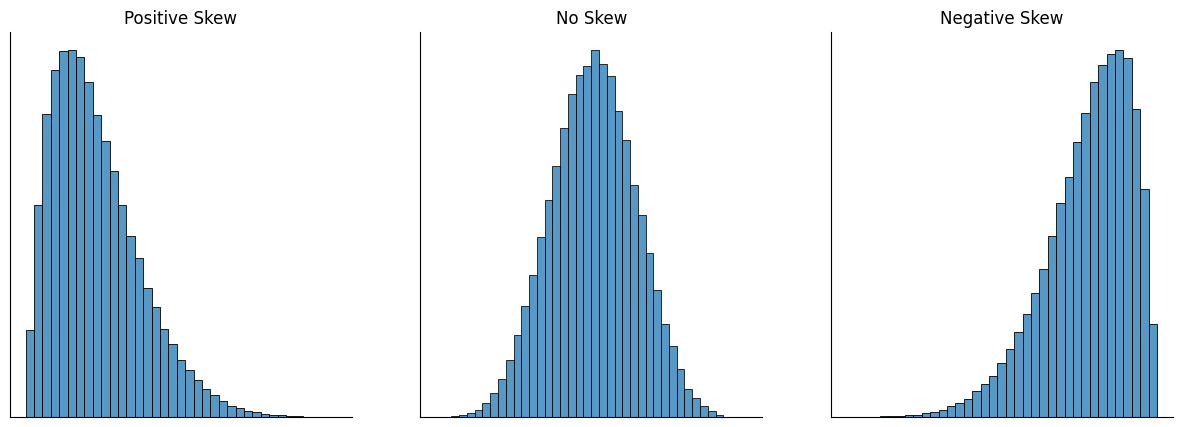

In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

ax1 = sns.histplot(data = df_skew.loc[df_skew['Skew'] == 'PosSkew'], x = 'Values', binwidth = 0.02, ax=axes[0])
ax2 = sns.histplot(data = df_skew.loc[df_skew['Skew'] == 'NoSkew'], x = 'Values', binwidth = 0.02, ax=axes[1])
ax3 = sns.histplot(data = df_skew.loc[df_skew['Skew'] == 'NegSkew'], x = 'Values', binwidth = 0.02, ax=axes[2])

axes[0].set_title("Positive Skew")
axes[1].set_title("No Skew")
axes[2].set_title("Negative Skew")

for ax in axes:
    ax.set(xticklabels=[])
    ax.set(yticklabels=[])
    ax.set(xlabel=None)
    ax.set(ylabel=None)
    ax.tick_params(bottom=False)
    ax.tick_params(left=False)

sns.despine()

In [ ]:
tips["total_bill"].skew(axis = 0, skipna = True) # 왜도

1.1332130376158205

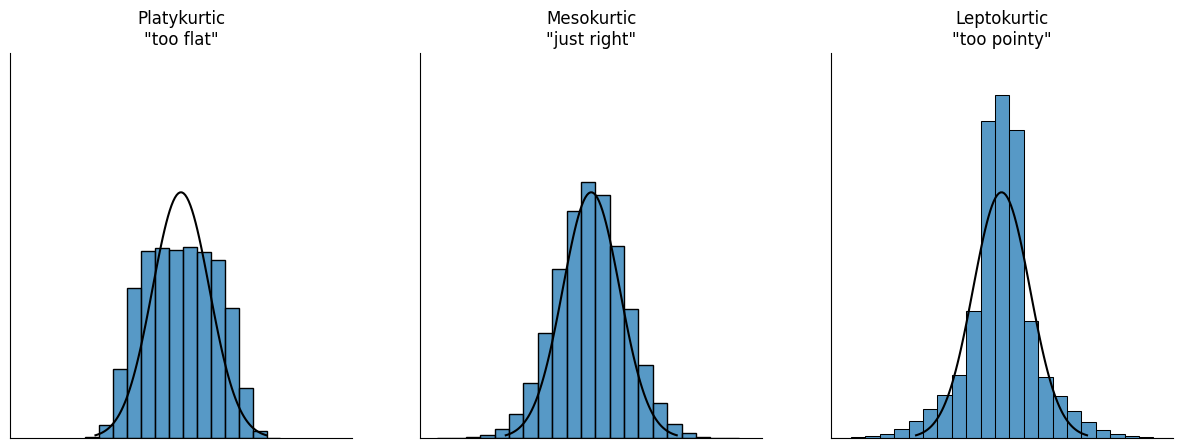

In [ ]:
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

# load some data

file1 = 'https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/kurtosisdata.csv'
file2 = 'https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/kurtosisdata_ncurve.csv'

df_kurtosis = pd.read_csv(file1)

# define a normal distribution with a mean of 0 and a standard deviation of 1
mu = 0
sigma = 1
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = stats.norm.pdf(x, mu, sigma)

platykurtic = df_kurtosis.loc[df_kurtosis["Kurtosis"] == "Platykurtic"]
mesokurtic = df_kurtosis.loc[df_kurtosis["Kurtosis"] == "Mesokurtic"]
leptokurtic = df_kurtosis.loc[df_kurtosis["Kurtosis"] == "Leptokurtic"]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

ax1 = sns.histplot(data=platykurtic, x = "Values", binwidth=.5, ax=axes[0])
ax2 = sns.histplot(data=mesokurtic, x = "Values", binwidth=.5,  ax=axes[1])
ax3 = sns.histplot(data=leptokurtic, x = "Values", binwidth=.5, ax=axes[2])

sns.lineplot(x=x,y=y*40000, ax=ax1, color='black')
sns.lineplot(x=x,y=y*40000, ax=ax2, color='black')
sns.lineplot(x=x,y=y*40000, ax=ax3, color='black')


axes[0].set_title("Platykurtic\n\"too flat\"")
axes[1].set_title("Mesokurtic\n\"just right\"")
axes[2].set_title("Leptokurtic\n\"too pointy\"")

for ax in axes:
    ax.set_xlim(-6,6)
    ax.set_ylim(0,25000)
    ax.set(xticklabels=[])
    ax.set(yticklabels=[])
    ax.set(xlabel=None)
    ax.set(ylabel=None)
    ax.tick_params(bottom=False)
    ax.tick_params(left=False)


sns.despine()

In [ ]:
print("Pandas: ", tips["total_bill"].kurtosis())
print("Pandas Fischer bias: ",stats.kurtosis(tips["total_bill"], fisher=True, bias=False))

Pandas:  1.2184840156638854
Pandas Fischer bias:  1.2184840156638854


### 표준편차
- 평균절대편차 구하기

In [ ]:
from statistics import mean

X = [56, 31, 56, 8, 32]             # 1. 데이터
X_bar = mean(X)                     # 2. 평균
AD = []                             # 3. 각 측정값이 평균으로부터 얼마만큼 떨어져 있는지 구하기 (절대값)
for i in X:                         #
    AD.append(abs((i-X_bar)))
ADD = mean(AD)                      # 4. 절대값들의 평균
print(ADD)

15.52


In [ ]:
import pandas as pd

data = pd.DataFrame({"X": [56, 31, 56, 8, 32]})
X_mean = data['X'].mean()
data['diff'] = abs(data['X'] - X_mean)
data['diff'].mean()

15.52

- 분산 구하기

In [ ]:
data = pd.DataFrame({"X": [56, 31, 56, 8, 32]})
X_mean = data['X'].mean()

v = []
for n in data['X']:
    squared_error = (n-X_mean)**2
    v.append(squared_error)
var = np.mean(v)
var

324.64

In [ ]:
data = pd.DataFrame({"X": [56, 31, 56, 8, 32]})
X_mean = data['X'].mean()
data['squared_diff'] = (data['X'] - X_mean) ** 2
data['squared_diff'].mean()

324.64

In [ ]:
# 분산 구하는 메서드
np.var(data['X'])

324.64

- 표준편차

In [ ]:
data = pd.DataFrame({"X": [56, 31, 56, 8, 32]})
X_mean = data['X'].mean()
data['squared_diff'] = (data['X'] - X_mean) ** 2
np.sqrt(data['squared_diff'].mean())

18.017769007288333

In [ ]:
np.std(data['X'])

18.017769007288333

In [ ]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


## 추정
- 모수 추정의 의미
- 조사를 여러번 할수록 정확도는 높아질 수 밖에 없음
  + 모수에 가까워질 수 밖에 없음

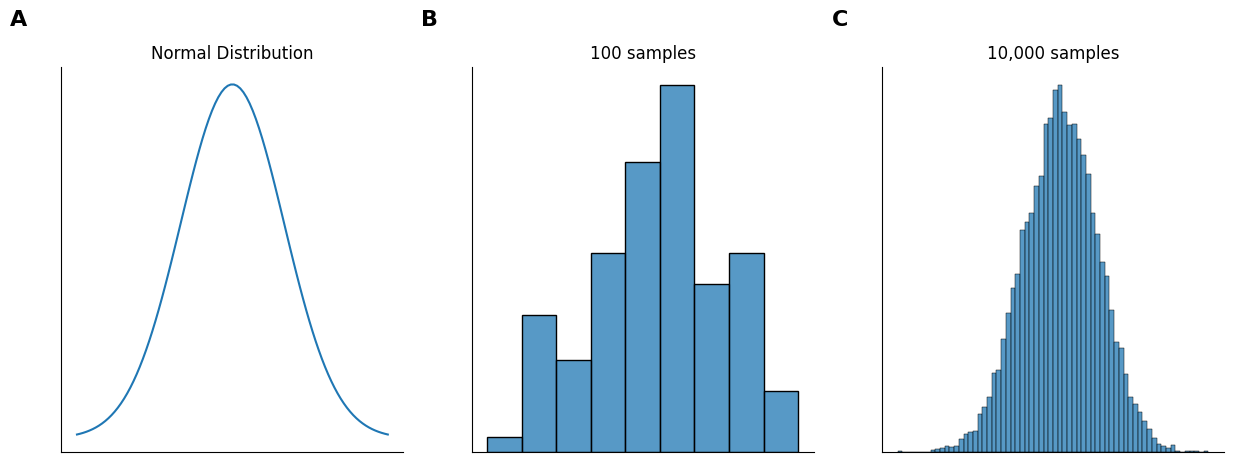

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import math

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

mu = 100
sigma = 15
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = stats.norm.pdf(x, mu, sigma)
ax0 = sns.lineplot(x=x,y=y, ax=axes[0])

IQ = np.random.normal(loc=100,scale=15,size=100)
ax1 = sns.histplot(IQ, ax=axes[1])

IQ = np.random.normal(loc=100,scale=15,size=10000)
ax2 = sns.histplot(IQ,ax=axes[2])

labels = ['A', 'B', 'C']
titles = ['Normal Distribution', '100 samples', '10,000 samples']
for i,ax in enumerate(axes):
    ax.set_title(titles[i])
    ax.text(-0.1, 1.15, labels[i], transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
    ax.set(xticklabels=[])
    ax.set(yticklabels=[])
    ax.set(ylabel=None)
    ax.tick_params(axis='both',
                   which='both',
                   bottom=False,
                   left=False)

sns.despine()

### 중심 극한 정리

In [ ]:
import numpy as np

IQ_1 = np.random.normal(loc=100,scale=15,size=5).astype(int)
print("시물레이션 데이터: ", IQ_1)
print("시물레이션 데이터의 평균: ", np.mean(IQ_1))

시물레이션 데이터:  [105 101  92  83 113]
시물레이션 데이터의 평균:  98.8


In [ ]:
IQ_2 = np.random.normal(loc=100,scale=15,size=5).astype(int)
print("시물레이션 데이터: ", IQ_2)
print("시물레이션 데이터의 평균: ", np.mean(IQ_2))

시물레이션 데이터:  [ 90  88 129  40  94]
시물레이션 데이터의 평균:  88.2


In [ ]:
import pandas as pd
df = pd.DataFrame(
    {'Person 1': np.random.normal(loc=100,scale=15,size=10).astype(int),
     'Person 2': np.random.normal(loc=100,scale=15,size=10).astype(int),
     'Person 3': np.random.normal(loc=100,scale=15,size=10).astype(int),
     'Person 4': np.random.normal(loc=100,scale=15,size=10).astype(int),
     'Person 5': np.random.normal(loc=100,scale=15,size=10).astype(int),
    })

df['Sample Mean']=df.mean(axis=1)
df.index=['Replication '+str(i+1) for i in range(df.shape[0])]
df

,Person 1,Person 2,Person 3,Person 4,Person 5,Sample Mean
Replication 1,99,116,81,120,117,106.6
Replication 2,94,116,86,101,87,96.8
Replication 3,84,98,106,91,121,100.0
Replication 4,99,87,120,102,114,104.4
Replication 5,71,111,71,128,101,96.4
Replication 6,90,76,115,108,90,95.8
Replication 7,98,112,100,118,97,105.0
Replication 8,81,126,88,80,136,102.2
Replication 9,90,122,112,111,94,105.8
Replication 10,100,129,118,97,118,112.4


### 표본 평균의 표본 분포
- sampling distribution of the mean
- Sample을 구한 후, 평균을 구하면 하나의 정규분포를 이루게 됨

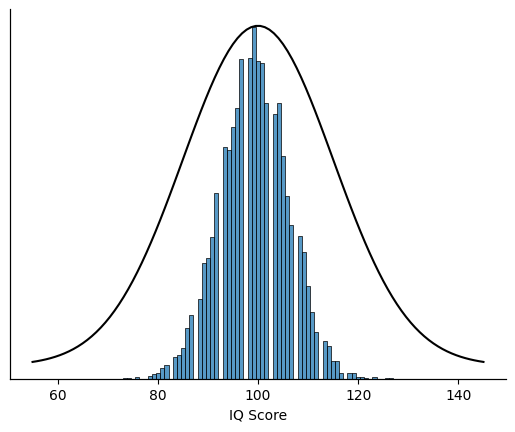

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import numpy as np
import statistics
import math

mu = 100
sigma = 15
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = stats.norm.pdf(x, mu, sigma)

sample_means = []
for i in range(1,10000):
    sample_mean = statistics.mean(np.random.normal(loc=100,scale=15,size=5).astype(int))
    sample_means.append(sample_mean)


fig, ax = plt.subplots()
sns.histplot(sample_means, ax=ax)
ax2 = ax.twinx()
sns.lineplot(x=x,y=y, ax=ax2, color='black')

axes=[ax, ax2]
for ax in axes:
    ax.set(yticklabels=[])
    ax.set(ylabel=None)
    ax.set(xlabel='IQ Score')
    ax.tick_params(axis='both',
                    which='both',
                    left=False,
                    right=False)
    ax.spines[['right', 'top']].set_visible(False)

### 구간 추정의 의미
- 구간 추정을 구하는 것 아래 코드와 같이 쉽게 구할 수 있음

In [ ]:
import numpy as np
import scipy.stats as st

data = [12, 12, 13, 13, 15, 16, 17, 22, 23, 25, 26, 27, 28, 28, 29]
st.t.interval(confidence=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data))

(16.75776979778498, 24.042230202215016)

- 아래 그래프의 의미
- 모수 추정시, 50번 수행하면 표본의 평균이 모수의 구간에 들어가지 못할 가능성이 5%는 존재한다.
  + 틀릴 가능성이 5% 존재한다. 95% 신뢰구간
  + 선거의 예, 신뢰구간 +/- 3%
    * A 후보 : 45.5% --> 42.5
    * B 후보 : 33.8% --> 36.8


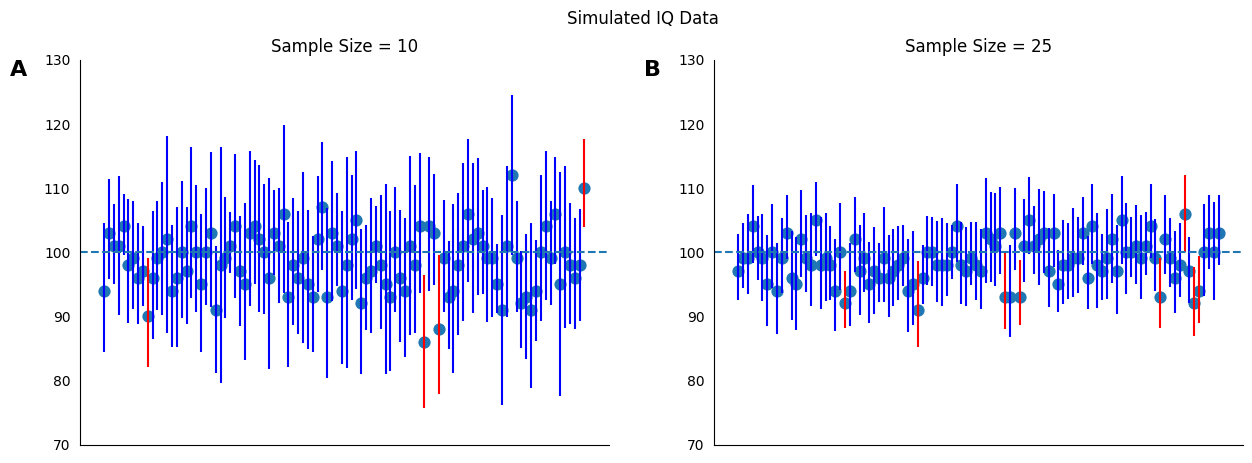

In [ ]:
from scipy.stats import t, sem
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import random

#set a random number generator for reproducibility
rng = np.random.default_rng(42)

#define simulation parameters
n_experiments = 100
ns = [10, 25]

#prepare labels for the figure panels
labels = ['A', 'B']

# prepare the figure, with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=False, sharex=False)
fig.suptitle('Simulated IQ Data')

# simulate the two sets of experiments, and make the figures.
for f, ax in enumerate(axes):

    # collect the upper and lower CI bounds, and the sample means for each experiment
    uppers = []
    lowers = []
    sample_means = []

    # for the x-axis, make a list of incrementing numbers
    x = list(range(0,n_experiments))

    # generate simulated data for each experiment by sampling from a normal distribution
    # with the parameters defined above
    # store the sample means and CI bounds in the lists above
    for i in x:
        simdata = rng.normal(loc=100,scale=15,size=ns[f]).astype(int)
        sample_means.append(statistics.mean(simdata))
        ci = t.interval(confidence=.95, df=len(simdata)-1, loc=np.mean(simdata), scale=sem(simdata))
        uppers.append(ci[1])
        lowers.append(ci[0])


    # find the experiments where the CI did not capture the population mean
    # and mark these with red. Color the others blue.
    too_high = [x[s] for s, val in enumerate(lowers) if val > 100]
    too_low = [x[s] for s, val in enumerate(uppers) if val < 100]
    no_mean = too_high + too_low
    highlight = ['blue']*n_experiments
    for s, val in enumerate(no_mean):
        highlight[val] = 'red'

    # plot the data and format the plots
    sns.pointplot(x=x, y=sample_means, linestyle='none', ax=ax)
    ax.set_ylim([70,130])
    ax.vlines(x=x, ymin=lowers, ymax=uppers, color = highlight)
    ax.axhline(y=100, linestyle = "dashed")
    ax.set_title("Sample Size = " + str(ns[f]))
    ax.set(ylabel=None)
    ax.text(-0.1, 1, labels[f], transform=ax.transAxes,fontsize=16, fontweight='bold', va='top', ha='right')
    ax.tick_params(left=False)
    ax.spines[['top', 'right']].set_visible(False)
    ax.tick_params(axis='both',
                    which='both',
                    left=False,
                    right=False,
                    bottom=False,
                    labelbottom=False)

### 구간추정 계산

In [ ]:
import seaborn as sns
data = range(1,25)

# Method 1:
import numpy as np
import scipy.stats as st
from scipy.stats import t

ci_1 = t.interval(confidence=0.95,
                  df=len(data)-1,
                  loc=np.mean(data),
                  scale=sem(data))


# Method 2:
# https://www.statsmodels.org/stable/index.html
import statsmodels.stats.api as sms
ci_2 = sms.DescrStatsW(data).tconfint_mean()

# Compare the methods
print("Method 1: ", ci_1)
print("Method 2: ", ci_2)

Method 1:  (9.514149929408497, 15.485850070591503)
Method 2:  (9.514149929408497, 15.485850070591503)


In [ ]:
import seaborn as sns
tips = sns.load_dataset("tips")

# Method 1:
import numpy as np
import scipy.stats as st
from scipy.stats import t

ci_1 = t.interval(confidence=0.95,
                  df=len(tips['total_bill'])-1,
                  loc=np.mean(tips['total_bill']),
                  scale=sem(tips['total_bill']))


# Method 2:
import statsmodels.stats.api as sms
ci_2 = sms.DescrStatsW(tips['total_bill']).tconfint_mean()

# Compare the methods
print("Method 1: ", ci_1)
print("Method 2: ", ci_2)

Method 1:  (18.663331704358473, 20.908553541543167)
Method 2:  (18.66333170435847, 20.908553541543164)


### 신뢰도 시각화

In [ ]:
import seaborn as sns
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


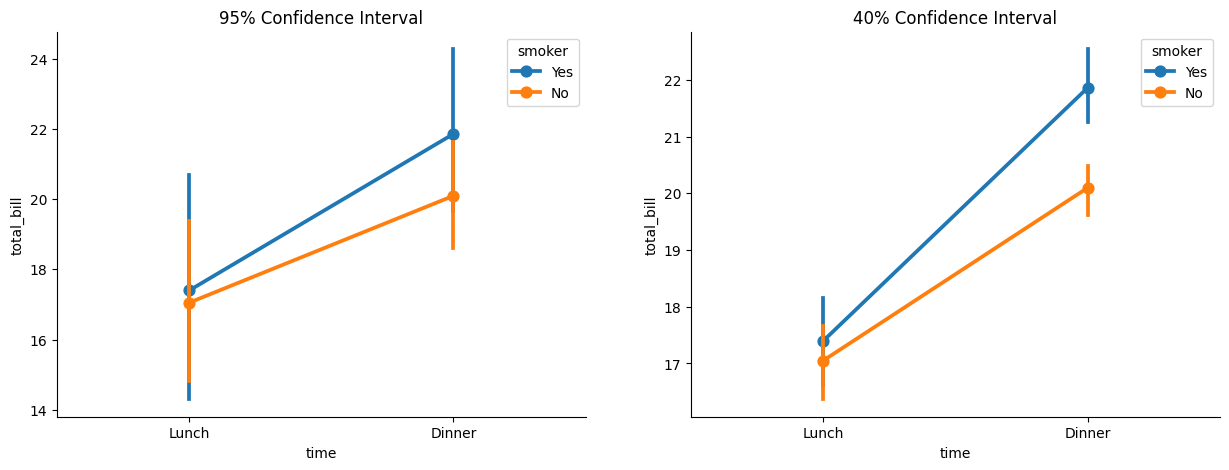

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
tips = sns.load_dataset("tips")

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.pointplot(x="time", y="total_bill", hue="smoker", data=tips, ax=axes[0])
sns.pointplot(x="time", y="total_bill", hue="smoker",  errorbar=('ci', 40), data=tips, ax=axes[1])
axes[0].set_title("95% Confidence Interval")
axes[1].set_title("40% Confidence Interval")
sns.despine()

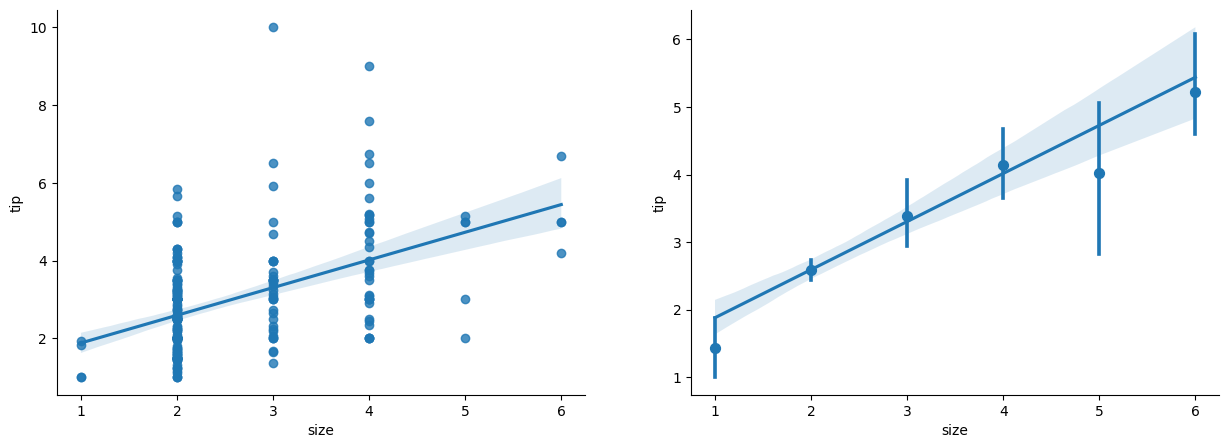

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
tips = sns.load_dataset("tips")

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.regplot(x="size", y="tip", data=tips, ax=axes[0])
sns.regplot(x="size", y="tip", data=tips, x_estimator=np.mean, ax=axes[1])

sns.despine()

## 평균비교
- z-검정 vs t검정
- z검정은 현실에서 사용할 가능성은 없음
  + why? z검정은 모수의 분산과 표편 등을 이미 알고 있어야 사용가능하기 때문.
  + 통계 수업에서 t-test 수업을 위한 중간 과정으로 많이 사용됨

### z-검정
- 모수의 평균이 67.5인 것으로 가정한다.
  + 간단한 질문, 모수의 평균이 67.5인데 왜 검정이 필요한가요? 이미 모수의 평균을 알고 있는데요!!
- https://ethanweed.github.io/pythonbook/05.02-ttest.html


In [ ]:
import pandas as pd
df = pd.DataFrame({"grades" : [50, 60, 60, 64, 66, 66, 67, 69, 70, 74, 76, 76, 77, 79, 79, 79, 81, 82, 82, 89]})
df.head()

,grades
0,50
1,60
2,60
3,64
4,66


In [ ]:
df['grades'].mean()

72.3

- 모수의 표준편차는 9.5로 알고 있다.

- H0 : mu = mubar(72.5)

  H1 : mu != mubar(72.5)

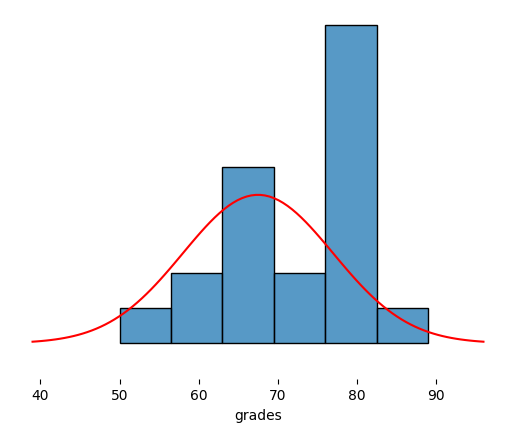

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

mu = 67.5
sigma = 9.5
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = 100* stats.norm.pdf(x, mu, sigma)

fig, ax = plt.subplots()
ax1 = sns.histplot(df['grades'])
#등급별로 나눈 히스토그램

ax2 = sns.lineplot(x=x,y=y, color='red')
#전체 모집단 기준의 CI 그래프

plt.ylim(bottom=-1)

ax1.set_frame_on(False)
ax1.axes.get_yaxis().set_visible(False)

plt.show()

#### 가설 설정
- 귀무가설 : 모수의 평균은 67.5일 것이다.
- 대립가설 : 표본의 평균은 67.5가 아닐 것이다.
- 조건 : 모수의 표준편차는 9.5라는 것을 알고 있다.
  + 모수의 표준편차를 알고 있고, 평균도 알고 있는데, 왜 굳이 검정을 하느냐!!

#### z-score 구하기
- 공식에 의거하여 z-score를 구한다.

In [ ]:
import math
sample_mean = df['grades'].mean()
sd_true = 9.5
mu_null = 67.5
N = len(df['grades'])
sem_true = sd_true / math.sqrt(N)
z_score = (sample_mean - mu_null) / sem_true
z_score # 통계량

2.259605535157681

In [ ]:
from statistics import NormalDist

lower_area = NormalDist().cdf(-z_score)
upper_area = lower_area
p_value = lower_area + upper_area
p_value

0.023845743764939864

### t-검정 (One-Sample t-test)
- z검정과의 차이점
  + 자유도 N-1
  + 모집단의 표준편차를 모름
- 가설설정
  + 귀무가설 : 표본의 평균은 모평균과 같다.
  + 대립가설 : 표본의 평균은 모평균과 다르다.

In [ ]:
N = len(df['grades'])
degfree = N-1
sample_mean = df['grades'].mean()
print('Sample mean:', sample_mean)
print('Degrees of freedom:', degfree)

Sample mean: 72.3
Degrees of freedom: 19


In [ ]:
from scipy.stats import ttest_1samp
t, p = ttest_1samp(a = df['grades'], popmean = 67.5)
t, p

(2.25471286700693, 0.03614521878144544)

In [ ]:
from scipy import stats

confidence_level = 0.95
degrees_freedom = len(df['grades'])-1
sample_mean = df['grades'].mean()
sample_standard_error = df['grades'].sem()

confidence_interval = stats.t.interval(confidence_level, degrees_freedom, sample_mean, sample_standard_error) #t-test의 신뢰구간 구하기
confidence_interval

(67.84421513791415, 76.75578486208585)

In [ ]:
ci = stats.ttest_1samp(df['grades'], popmean=mu_null).confidence_interval()
ci

ConfidenceInterval(low=67.84421513791415, high=76.75578486208585)

### t-검정 (Independent t-test)
- 두가지 확인
  + 각 데이터의 정규성 검정
  + 두 그룹간의 등분산성 검정

In [1]:
import seaborn as sns
import pandas as pd

tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 시각화
- 범주가 2개인 것을 찾아야 한다. -> sex, smoker, time 확인
- 시나리오
  + 성별에 따른 평균차이
  + 흡연 여부에 따른 평균차이
  + 시간대에 따른 평균차이
- 데이터가 연속형, 히스토그램을 그려야 한다.
- tip을 그린다.

In [5]:
tips.apply(lambda x : x.unique())

,0
total_bill,"[16.99, 10.34, 21.01, 23.68, 24.59, 25.29, 8.7..."
tip,"[1.01, 1.66, 3.5, 3.31, 3.61, 4.71, 2.0, 3.12,..."
sex,"['Female', 'Male'] Categories (2, object): ['M..."
smoker,"['No', 'Yes'] Categories (2, object): ['Yes', ..."
day,"['Sun', 'Sat', 'Thur', 'Fri'] Categories (4, o..."
time,"['Dinner', 'Lunch'] Categories (2, object): ['..."
size,"[2, 3, 4, 1, 6, 5]"


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sex = tips.loc[tips['sex'] == "Male"]['tip']
sex2 = tips.loc[tips['sex'] != "Male"]['tip']

smoker = tips.loc[tips['smoker'] == "No"]['tip']
smoker2 = tips.loc[tips['smoker'] != "No"]['tip']

time = tips.loc[tips['time'] == "Dinner"]['tip']
time2 = tips.loc[tips['time'] != "Dinner"]['tip']

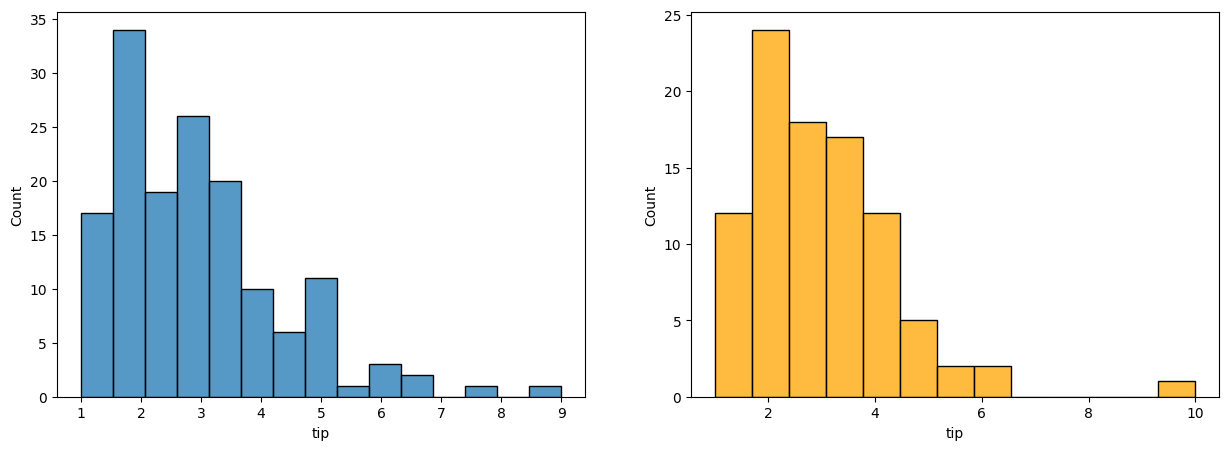

In [16]:
fix, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
sns.histplot(smoker, ax = ax[0])
sns.histplot(smoker2, ax = ax[1], color = 'orange')
plt.show()

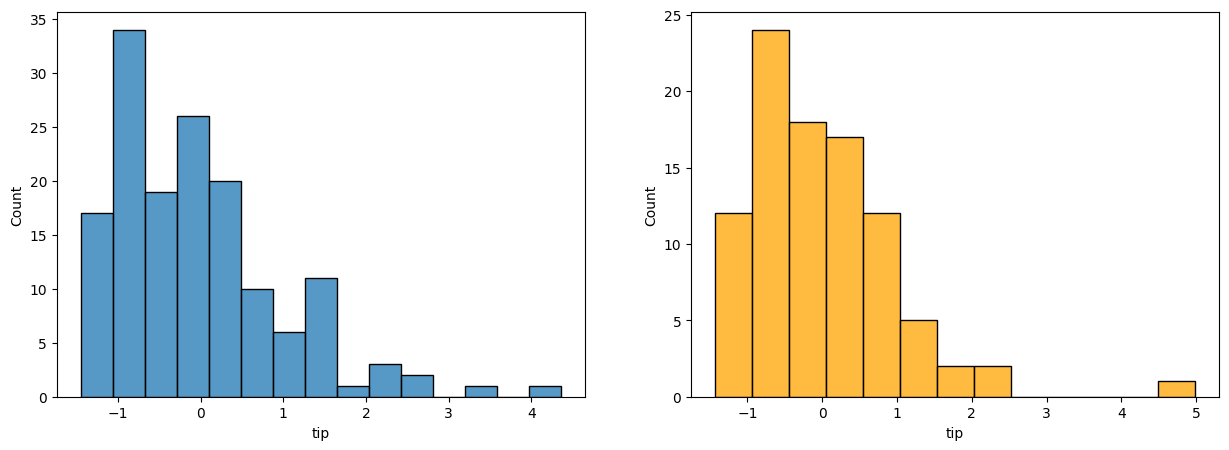

In [27]:
#데이터의 표준화

smoker_norm = smoker.apply(lambda x: (x - smoker.mean()) / smoker.std())
smoker2_norm = smoker2.apply(lambda x: (x - smoker2.mean()) / smoker2.std())

fix, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
sns.histplot(smoker_norm, ax = ax[0])
sns.histplot(smoker2_norm, ax = ax[1], color = 'orange')
plt.show()

In [41]:
from scipy.stats import ttest_1samp

mu = tips["tip"].mean()

t,p = ttest_1samp(smoker, popmean = mu)
t,p


(-0.057322624946865984, 0.954364486577824)

In [ ]:
from scipy.stats import ttest_1samp

t, p = ttest_1samp(a = df['grades'], popmean = 67.5)
t, p

#귀무가설 기각 (검정통계량이 기각역 안에 있으며, p값이 유의수준 0.05보다 작음.)

(2.25471286700693, 0.03614521878144544)

In [ ]:
ttest_1samp(a = df['grades'], popmean = 67.5).confidence_interval()

ConfidenceInterval(low=67.84421513791415, high=76.75578486208585)

In [ ]:
tips_summary = pd.DataFrame(
    {'Smoker': ['Smoker_Yes','Smoker_No'],
     'mean': [tips.loc[tips['smoker'] == 'Yes']['tip'].mean().round(2),
             tips.loc[tips['smoker'] == 'No']['tip'].mean().round(2)],
     'std dev': [tips.loc[tips['smoker'] == 'Yes']['tip'].std(),
                tips.loc[tips['smoker'] == 'No']['tip'].std()],
     'N': [len(tips.loc[tips['smoker'] == 'Yes']),
           len(tips.loc[tips['smoker'] == 'No'])]
    })

tips_summary

,Smoker,mean,std dev,N
0,Smoker_Yes,3.01,1.401468,93
1,Smoker_No,2.99,1.377190,151


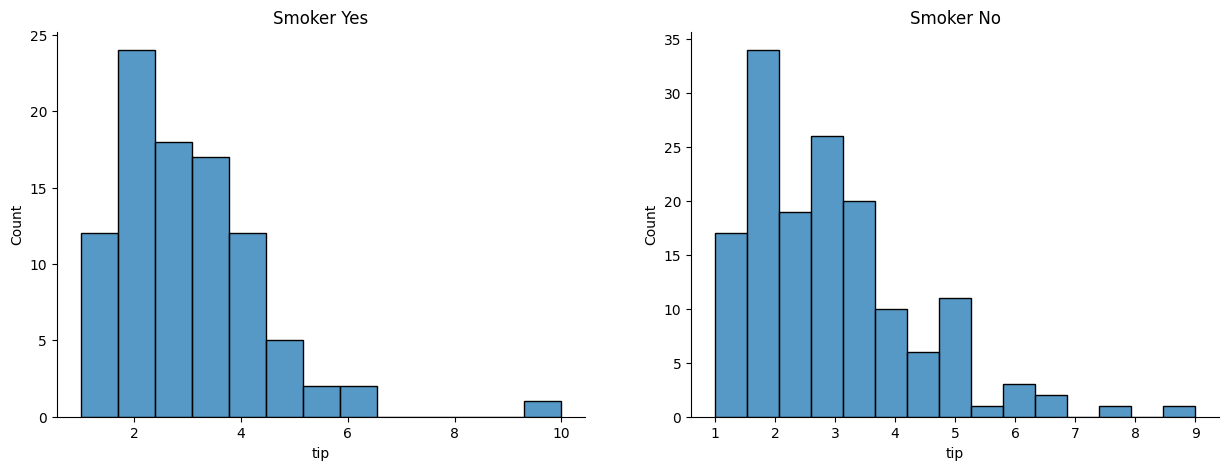

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
smoker_yes = pd.DataFrame(tips.loc[tips['smoker'] == 'Yes']['tip'])
smoker_no = pd.DataFrame(tips.loc[tips['smoker'] == 'No']['tip'])

sns.histplot(smoker_yes['tip'], ax = axes[0])
sns.histplot(smoker_no['tip'], ax = axes[1])

axes[0].set_title('Smoker Yes')
axes[1].set_title('Smoker No')

sns.despine()

plt.show()

#이 데이터를 표준화 시키면 좀 정규분포 같아질까?

#### Shapiro-Wilk 검정
- 가설검정
  + 귀무가설 : 데이터는 정규분포이다.
  + 대립가설 : 데이터는 정규분포를 이루고 있지 않다.



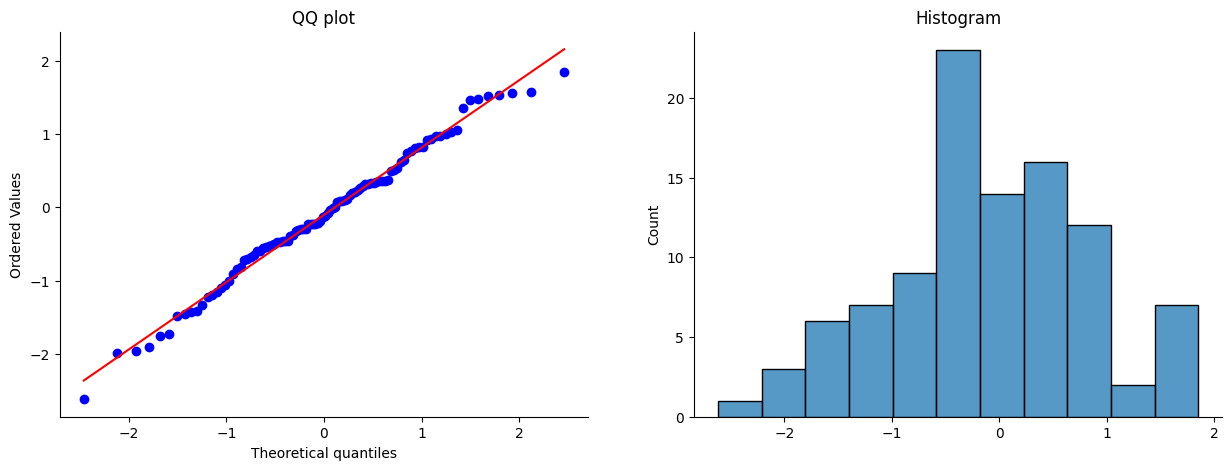

ShapiroResult(statistic=0.9898831844329834, pvalue=0.6551515460014343)

In [ ]:
# 정규분포를 이루는 데이터
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import probplot
from scipy.stats import shapiro

np.random.seed(42)
normal_data = np.random.normal(size=100)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

probplot(normal_data, dist="norm", plot = axes[0]);
sns.histplot(normal_data, axes=axes[1]);

titles = ['QQ plot', 'Histogram']
for i, ax in enumerate(axes):
    ax.spines[['right', 'top']].set_visible(False)
    ax.set_title(titles[i])

plt.show()
shapiro(normal_data)

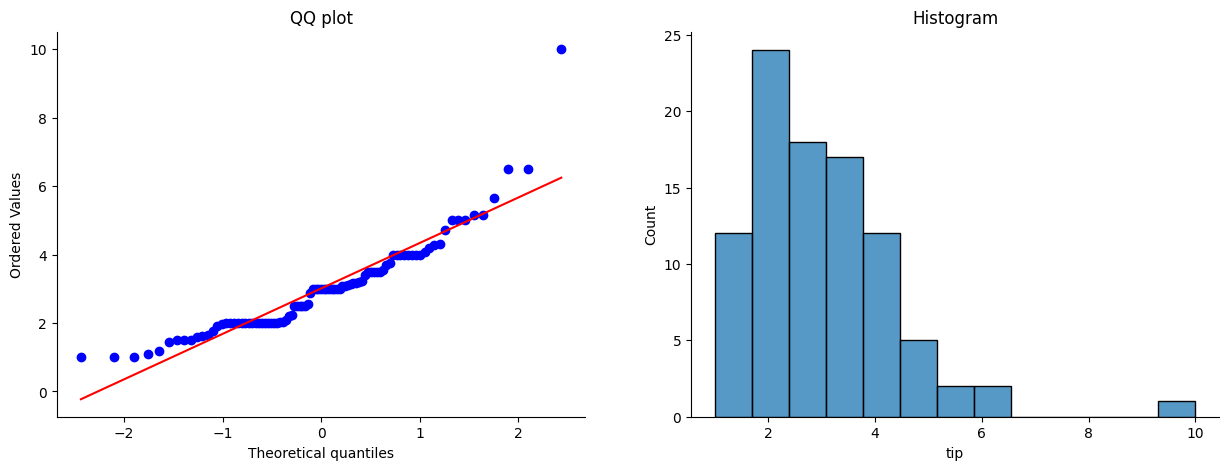

ShapiroResult(statistic=0.8788247108459473, pvalue=3.6124649227531336e-07)

In [ ]:
# 정규분포를 이루지 못하는 데이터
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import probplot
from scipy.stats import shapiro

np.random.seed(42)
normal_data = smoker_yes['tip']

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

probplot(normal_data, dist="norm", plot = axes[0]);
sns.histplot(normal_data, axes=axes[1]);

titles = ['QQ plot', 'Histogram']
for i, ax in enumerate(axes):
    ax.spines[['right', 'top']].set_visible(False)
    ax.set_title(titles[i])

plt.show()
shapiro(normal_data)

- 여기서 중요한 것, 그럼에도 불구하고 중심극한정리에 의해 정규성이 있다고 봄

In [ ]:
tips['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

#### levene 검정 - 등분산성 검정
- 가설검정
  + 귀무가설 : 두 집단의 분산이 같다
  + 대립가설 : 두 집단의 분산이 다르다

In [ ]:
from scipy.stats import levene
stat, p = levene(smoker_yes['tip'], smoker_no['tip'])

print('Levene statistic:', stat)
print('p-value:', p)

Levene statistic: 0.02051159105706963
p-value: 0.8862366542563406


- 시각화

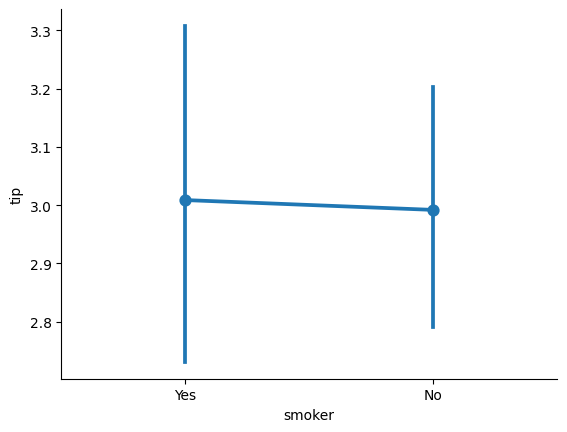

In [ ]:
fig, axes = plt.subplots(1, 1)
sns.pointplot(x = 'smoker', y = 'tip', data = tips)
sns.despine()

In [46]:
from scipy import stats

t,p = stats.levene(smoker, smoker2)
t,p #귀무가설이 매우 강력하게 채택될 증거가 있다. 따라서 두 데이터의 분산은 같다.

(0.02051159105706963, 0.8862366542563406)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


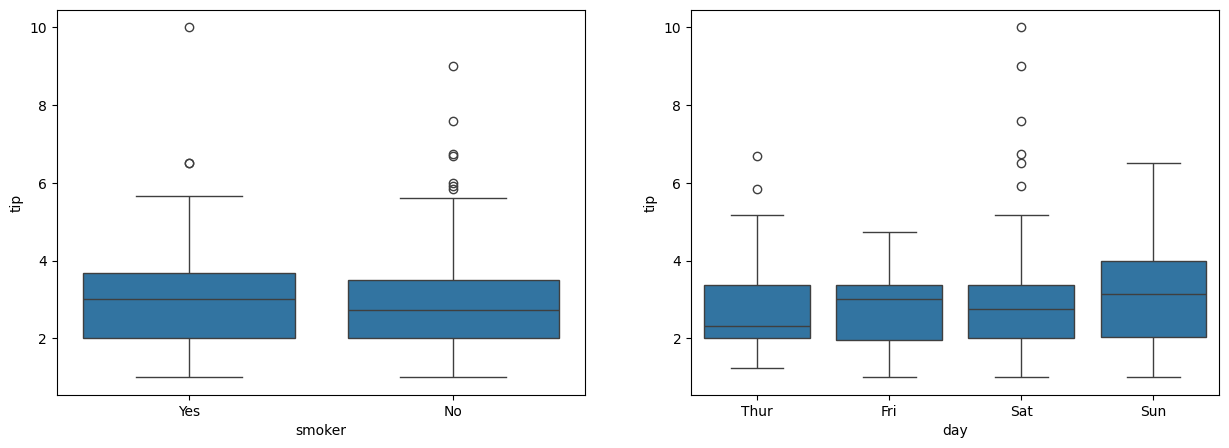

In [48]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

sns.boxplot(x = 'smoker', y = 'tip', data = tips, ax = ax[0])
sns.boxplot(x = 'day', y = 'tip', data = tips, ax = ax[1])
plt.show()

#### 가설검정
- 귀무가설 : 두 그룹의 평균은 같다
- 대립가설 : 두 그룹의 평균은 다르다

In [ ]:
from scipy import stats
t_stat, p_val = stats.ttest_ind(smoker_yes['tip'], smoker_no['tip'], equal_var=True)

# Output the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: 0.09222805186888201
P-value: 0.9265931522244976


### t-검정 (Paired t-test)
- 가상 테이블 생성

In [ ]:
import pandas as pd
import numpy as np

np.random.seed(42)

exam1_scores = np.random.uniform(50, 100, 20)
exam2_scores = exam1_scores + np.random.normal(0, 10, 20)

df = pd.DataFrame({
    'Student_ID': range(1, 21),
    'Exam1_Score': exam1_scores,
    'Exam2_Score': exam2_scores
})

df['Exam1_Score'] = df['Exam1_Score'].astype('int64')
df['Exam2_Score'] = df['Exam2_Score'].astype('int64')
df['diff'] = df['Exam2_Score'] - df['Exam1_Score']

df.head(1)

,Student_ID,Exam1_Score,Exam2_Score,diff
0,1,68,58,-10


In [ ]:
df.shape

(20, 4)

#### Shapiro-Wilk 검정
- 가설검정
  + 귀무가설 : 데이터는 정규분포이다.
  + 대립가설 : 데이터는 정규분포를 이루고 있지 않다.
- 여기에서의 데이터는 diff 컬럼을 의미

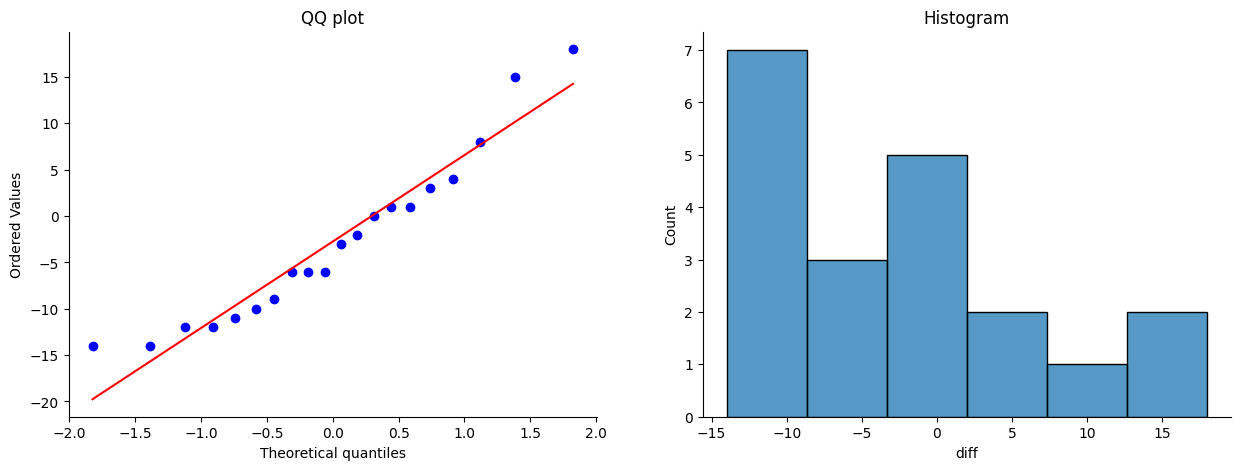

ShapiroResult(statistic=0.9267928004264832, pvalue=0.13394035398960114)

In [ ]:
np.random.seed(42)
normal_data = df['diff']

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

probplot(normal_data, dist="norm", plot = axes[0]);
sns.histplot(normal_data, axes=axes[1]);

titles = ['QQ plot', 'Histogram']
for i, ax in enumerate(axes):
    ax.spines[['right', 'top']].set_visible(False)
    ax.set_title(titles[i])

plt.show()
shapiro(normal_data)

#### 가설검정
- 귀무가설 : After/Before 평균 점수의 차이는 0이다
- 대립가설 : After/Before 평균 점수의 차이는 0이 아니다

In [ ]:
from scipy.stats import shapiro, ttest_rel

differences = df['Exam2_Score'] - df['Exam1_Score']
shapiro_stat, shapiro_p = shapiro(differences)

if shapiro_p > 0.05:
    t_stat, p_val = ttest_rel(df['Exam1_Score'], df['Exam2_Score'])
else:
    t_stat, p_val = None, None

shapiro_stat, shapiro_p, t_stat, p_val

(0.9267928004264832,
 0.13394035398960114,
 1.343652804294727,
 0.19488870621876497)

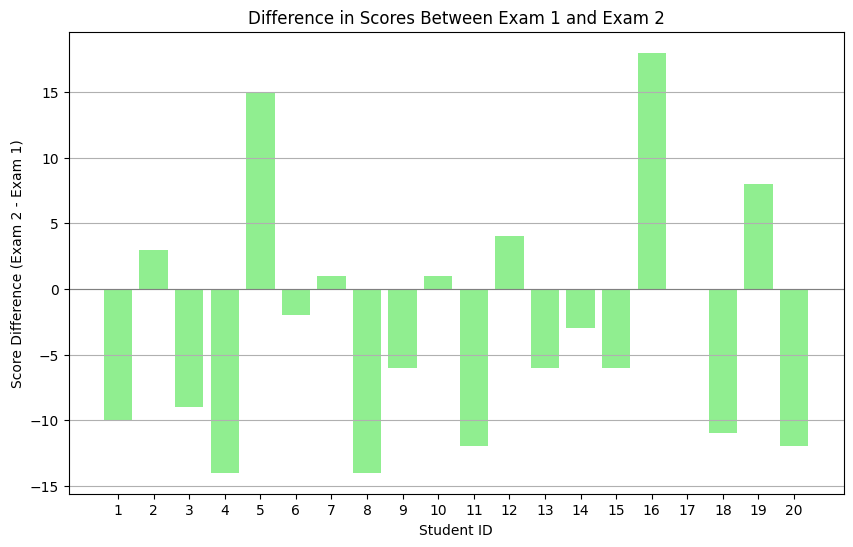

In [ ]:
# Creating a difference plot using the object-oriented approach with fig, ax
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the differences
ax.bar(df['Student_ID'], df['diff'], color='lightgreen')

# Adding labels and title using the object-oriented approach
ax.set_title('Difference in Scores Between Exam 1 and Exam 2')
ax.set_xlabel('Student ID')
ax.set_ylabel('Score Difference (Exam 2 - Exam 1)')
ax.axhline(0, color='gray', linewidth=0.8)  # Add a line at zero for reference
ax.set_xticks(df['Student_ID'])

# Display the plot with grid
ax.grid(axis='y')

plt.show()

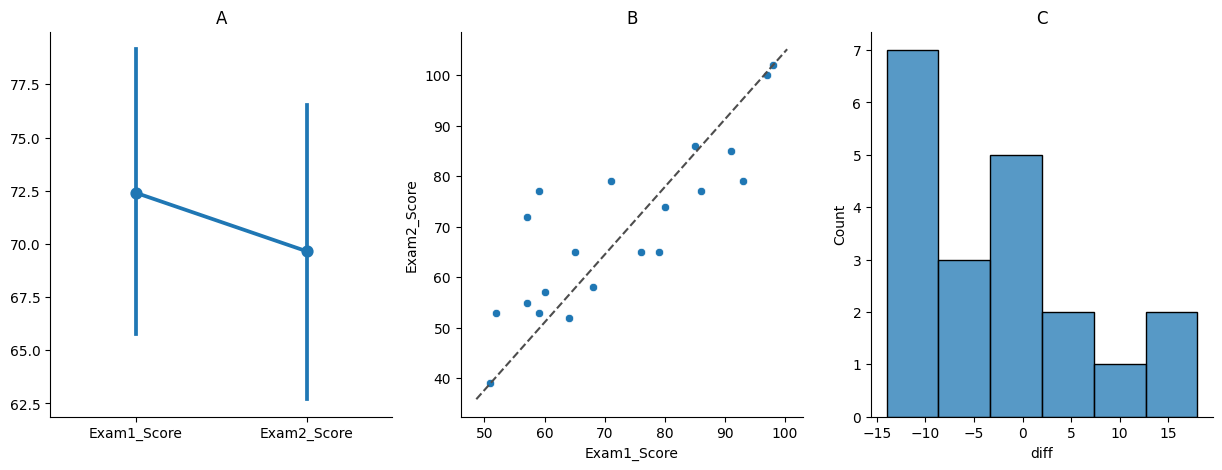

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

sns.pointplot(data=df.loc[:, ['Student_ID', 'Exam1_Score', 'Exam2_Score']].set_index("Student_ID"), ax = ax1)
sns.scatterplot(data = df, x='Exam1_Score', y='Exam2_Score', ax = ax2)

ax2.plot(ax2.get_xlim(), ax2.get_ylim(), ls="--", c=".3")

#ax1.set_ylim(40,80)
#ax1.set_xlim(40,80)
#ax1.set_ylim(40,80)

sns.histplot(data = df, x='diff')

ax1.title.set_text('A')
ax2.title.set_text('B')
ax3.title.set_text('C')

sns.despine()

plt.show()

### 분산분석
- 데이터 불러오기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/2024/한국SW기술진흥협회/Python기초통계/data/anova.csv")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/2024/한국SW기술진흥협회/Python기초통계/data/anova.csv'

In [ ]:
df.groupby('Hair color')['Pain threshold'].agg(['mean', 'std'])

,mean,std
Hair color,,
Dark Blond,51.2,9.284396
Dark Brunette,37.4,8.324662
Light Blond,59.2,8.526429
Light Brunette,42.5,5.446712


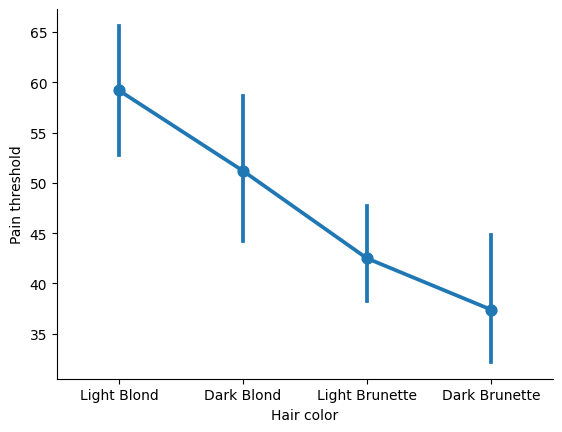

In [ ]:
fig = sns.pointplot(x='Hair color', y = 'Pain threshold', data = df)
sns.despine()

#### Shapiro-Wilk 검정
- 가설검정
  + 귀무가설 : 데이터는 정규분포이다.
  + 대립가설 : 데이터는 정규분포를 이루고 있지 않다.
- 여기에서의 데이터는 각 그룹의 데이터를 의미

In [ ]:
stat, p = shapiro(df[df['Hair color'] == 'Light Blond']['Pain threshold'])
print('Shapiro-Wilk Test for Light Blond:', p)

Shapiro-Wilk Test for Light Blond: 0.9831812381744385


In [ ]:
stat, p = shapiro(df[df['Hair color'] == 'Dark Blond']['Pain threshold'])
print('Shapiro-Wilk Test for Light Blond:', p)

Shapiro-Wilk Test for Light Blond: 0.6644565463066101


In [ ]:
stat, p = shapiro(df[df['Hair color'] == 'Light Brunette']['Pain threshold'])
print('Shapiro-Wilk Test for Light Blond:', p)

Shapiro-Wilk Test for Light Blond: 0.5979740619659424


In [ ]:
stat, p = shapiro(df[df['Hair color'] == 'Dark Brunette']['Pain threshold'])
print('Shapiro-Wilk Test for Light Blond:', p)

Shapiro-Wilk Test for Light Blond: 0.3241285979747772


#### levene 검정

In [ ]:
stat, p = levene(df[df['Hair color'] == 'Light Blond']['Pain threshold'],
                 df[df['Hair color'] == 'Dark Blond']['Pain threshold'],
                 df[df['Hair color'] == 'Light Brunette']['Pain threshold'],
                 df[df['Hair color'] == 'Dark Brunette']['Pain threshold'])
print('Levene’s Test:', p)

Levene’s Test: 0.7600161269687682


#### 가설검정

In [ ]:
import pandas as pd
from scipy.stats import shapiro, levene, f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols

f_stat, p_value = f_oneway(df[df['Hair color'] == 'Light Blond']['Pain threshold'],
                 df[df['Hair color'] == 'Dark Blond']['Pain threshold'],
                 df[df['Hair color'] == 'Light Brunette']['Pain threshold'],
                 df[df['Hair color'] == 'Dark Brunette']['Pain threshold'])
print('F-Statistic:', f_stat, 'P-value:', p_value)

F-Statistic: 6.791407046264097 P-value: 0.004114227333077399


In [ ]:
model = ols('Q("Pain threshold") ~ C(Q("Hair color"))', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                         sum_sq    df         F    PR(>F)
C(Q("Hair color"))  1360.726316   3.0  6.791407  0.004114
Residual            1001.800000  15.0       NaN       NaN


#### 잔차의 정규성 검정

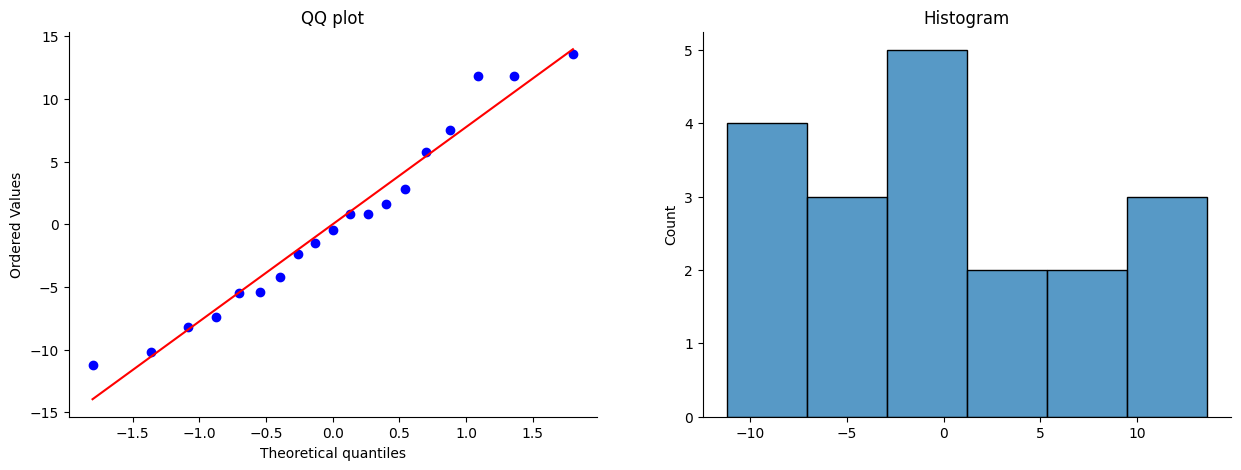

ShapiroResult(statistic=0.9545313715934753, pvalue=0.47012507915496826)

In [ ]:
import seaborn as sns
from scipy.stats import shapiro

res = model.resid
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

probplot(res, dist="norm", plot = axes[0]);
sns.histplot(res, axes=axes[1]);

titles = ['QQ plot', 'Histogram']
for i, ax in enumerate(axes):
    ax.spines[['right', 'top']].set_visible(False)
    ax.set_title(titles[i])

plt.show()
shapiro(res)

#### 사후검정
- 귀무가설을 기각할 때만 사후검정 실시

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm

tukey_results = pairwise_tukeyhsd(endog=df['Pain threshold'],    # Data
                                  groups=df['Hair color'],      # Groups
                                  alpha=0.05)                   # Significance level

# Print results
print(tukey_results)

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1        group2     meandiff p-adj   lower    upper  reject
--------------------------------------------------------------------
   Dark Blond  Dark Brunette    -13.8 0.0741 -28.6967  1.0967  False
   Dark Blond    Light Blond      8.0 0.4356  -6.8967 22.8967  False
   Dark Blond Light Brunette     -8.7 0.4147 -24.5004  7.1004  False
Dark Brunette    Light Blond     21.8 0.0037   6.9033 36.6967   True
Dark Brunette Light Brunette      5.1 0.7893 -10.7004 20.9004  False
  Light Blond Light Brunette    -16.7 0.0366 -32.5004 -0.8996   True
--------------------------------------------------------------------


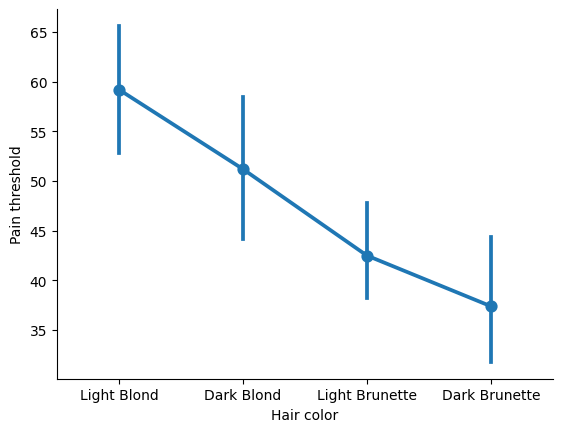

In [ ]:
fig = sns.pointplot(x='Hair color', y = 'Pain threshold', data = df)
sns.despine()

## pingouin
- 실무에서 쓰는 걸 강력 추천
- 링크 : https://pingouin-stats.org/build/html/index.html

In [ ]:
!pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 2.0 MB/s eta 0:00:00


In [ ]:
import pingouin
pingouin.__version__

'0.5.4'

In [ ]:
import pingouin as pg

# Load an example dataset comparing pain threshold as a function of hair color
df = pg.read_dataset('anova')

# 1. This is a between subject design, so the first step is to test for equality of variances
pg.homoscedasticity(data=df, dv='Pain threshold', group='Hair color')

,W,pval,equal_var
levene,0.392743,0.760016,True


In [ ]:
# 2. If the groups have equal variances, we can use a regular one-way ANOVA
pg.anova(data=df, dv='Pain threshold', between='Hair color')

,Source,ddof1,ddof2,F,p-unc,np2
0,Hair color,3,15,6.791407,0.004114,0.575962


In [ ]:
# 3. If there is a main effect, we can proceed to post-hoc Tukey test
pg.pairwise_tukey(data=df, dv='Pain threshold', between='Hair color')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Dark Blond,Dark Brunette,51.2,37.4,13.8,5.168623,2.669957,0.074068,1.413596
1,Dark Blond,Light Blond,51.2,59.2,-8.0,5.168623,-1.547801,0.435577,-0.810661
2,Dark Blond,Light Brunette,51.2,42.5,8.7,5.482153,1.586968,0.414728,0.982361
3,Dark Brunette,Light Blond,37.4,59.2,-21.8,5.168623,-4.217758,0.003708,-2.336811
4,Dark Brunette,Light Brunette,37.4,42.5,-5.1,5.482153,-0.930291,0.789321,-0.626769
5,Light Blond,Light Brunette,59.2,42.5,16.7,5.482153,3.046249,0.036647,2.015280
